Trabalho apresentado ENIAC 2023

**Título**: Estimate Composite Mechanical Properties

**Autores**: Janaína Gomide, Lucas Vignoli e Yuri Macedo

Instituto Politécnico

Universidade Federal do Rio de Janeiro


# Importar Bibliotecas

In [1]:
# -*- coding: utf-8 -*-

import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import numpy as np
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.utils.vis_utils import plot_model


# 1 - Carregar conjunto de dados

1.1 - Dados gerados pelo modelo de Homogeneização Assimptótica

In [70]:
"""#Importando Dados

##Dados Homogeneização Assimptótica

Importado os dados gerados pelo método da homogeneização assintótica.
"""

#from google.colab import drive
#drive.mount('/content/drive')

root_path = ""
dados_gerados_path=os.path.join(root_path,"Dados","Modelo.csv")

df=pd.read_csv(dados_gerados_path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Vf,E1f,E2f,G12f,G23f,nu12f,Em,num,E1,E2,G12,G23,nu12
0,0.30,70.0,70.0,29.166667,29.166667,0.20000,1.0,0.3,21.702886,1.926854,0.703220,0.712248,0.262646
1,0.30,70.0,70.0,29.015544,29.015544,0.20625,1.0,0.3,21.702536,1.926664,0.703157,0.712183,0.264978
2,0.30,70.0,70.0,28.865979,28.865979,0.21250,1.0,0.3,21.702210,1.926474,0.703095,0.712118,0.267310
3,0.30,70.0,70.0,28.717949,28.717949,0.21875,1.0,0.3,21.701905,1.926283,0.703033,0.712052,0.269643
4,0.30,70.0,70.0,28.571429,28.571429,0.22500,1.0,0.3,21.701624,1.926094,0.702971,0.711987,0.271976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124580,0.75,300.0,40.0,23.333333,10.000000,0.35000,6.0,0.4,226.506070,24.890805,10.788995,7.052964,0.359618
124581,0.75,300.0,40.0,30.000000,5.000000,0.35000,6.0,0.4,226.505118,23.701951,12.188052,4.186704,0.357511
124582,0.75,300.0,40.0,30.000000,6.666667,0.35000,6.0,0.4,226.505512,24.042641,12.188052,5.233530,0.358505
124583,0.75,300.0,40.0,30.000000,8.333333,0.35000,6.0,0.4,226.505821,24.483368,12.188052,6.184893,0.359154


In [3]:
"""###Separando em X e y"""

X=df.iloc[:,0:8]
print("X")
print(X.head())

y_E1, y_E2, y_G12, y_G23, y_nu12=df.iloc[:,8], df.iloc[:,9], df.iloc[:,10], df.iloc[:,11], df.iloc[:,12]
print("y_E1")
print(y_E1.head())
y_NNW=df.iloc[:,8:]

"""Realizando a divisão entre treino e teste nos dados gerados."""

X_train,X_test,y_E1_train,y_E1_test,y_E2_train,y_E2_test,y_G12_train,y_G12_test,y_G23_train,y_G23_test,y_nu12_train,y_nu12_test,y_NNW_train,y_NNW_test=train_test_split(X,y_E1,y_E2,y_G12,y_G23,y_nu12,y_NNW,
                                                     train_size=0.8,random_state=2)

y_todos = df.iloc[:,8:13]
X_train,X_test,y_todos_train,y_todos_test = train_test_split(X,y_todos,train_size=0.8,random_state=2)

X
    Vf   E1f   E2f       G12f       G23f    nu12f   Em  num
0  0.3  70.0  70.0  29.166667  29.166667  0.20000  1.0  0.3
1  0.3  70.0  70.0  29.015544  29.015544  0.20625  1.0  0.3
2  0.3  70.0  70.0  28.865979  28.865979  0.21250  1.0  0.3
3  0.3  70.0  70.0  28.717949  28.717949  0.21875  1.0  0.3
4  0.3  70.0  70.0  28.571429  28.571429  0.22500  1.0  0.3
y_E1
0    21.702886
1    21.702536
2    21.702210
3    21.701905
4    21.701624
Name: E1, dtype: float64


1.2 - Dados obtidos por experimentos práticos

In [4]:
"""##Dados práticos

Importando os dados experimentais dos artigos.
"""

dados_reais_path=os.path.join(root_path,"Dados","dados elasticos_v6c.xlsx")

df_real_lamina=pd.read_excel(dados_reais_path,sheet_name='lamina')
df_real_lamina=df_real_lamina.drop(['Unnamed: 0','Unnamed: 1','Unnamed: 11','lamina.1','Reference','Vv','nu23'],axis=1)
df_real_lamina

df_real_fibra=pd.read_excel(dados_reais_path,sheet_name='fibra')
df_real_fibra=df_real_fibra.drop(['Unnamed: 0','Unnamed: 8','nu23f'],axis=1)
df_real_fibra

df_real_matriz=pd.read_excel(dados_reais_path,sheet_name='matriz')
df_real_matriz=df_real_matriz.drop(['Unnamed: 4','Gm'],axis=1)
df_real_matriz

"""Combinado as tabelas de lâmina, fibra e matriz em um único DataFrame."""

df_real=df_real_lamina.merge(df_real_fibra,on='lamina')
df_real=df_real.merge(df_real_matriz,on='lamina')
df_real=df_real[df_real["lamina"]!=4]


"""Realizado a divisão de X e y, sendo um y para cada propriedade, para os métodos de Regressão Linear, Árvore de Decisão e Florestas Aleatórias.

###E1
"""

E1_real=df_real.loc[:,['E1','Vf','E1f','E2f','G12f','G23f','nu12f','Em','num'	]]
E1_real=E1_real.dropna()

X_E1_real=E1_real.loc[:,['Vf','E1f','E2f','G12f','G23f','nu12f','Em','num']]
y_E1_real=E1_real.loc[:,['E1']]
print("E1_real",len(E1_real))
print(E1_real)
y_E1_real
E1_real

X_E1_real

"""###E2"""

E2_real=df_real.loc[:,['E2','Vf','E1f','E2f','G12f','G23f','nu12f','Em','num'	]]
E2_real=E2_real.dropna()

X_E2_real=E2_real.loc[:,['Vf','E1f','E2f','G12f','G23f','nu12f','Em','num']]
y_E2_real=E2_real.loc[:,['E2']]
print("E2_real",len(E2_real))

"""###G12"""

G12_real=df_real.loc[:,['G12','Vf','E1f','E2f','G12f','G23f','nu12f','Em','num'	]]
G12_real=G12_real.dropna()

X_G12_real=G12_real.loc[:,['Vf','E1f','E2f','G12f','G23f','nu12f','Em','num']]
y_G12_real=G12_real.loc[:,['G12']]
print("G12_real",len(G12_real))

"""###G23"""

G23_real=df_real.loc[:,['G23','Vf','E1f','E2f','G12f','G23f','nu12f','Em','num'	]]
G23_real=G23_real.dropna()

X_G23_real=G23_real.loc[:,['Vf','E1f','E2f','G12f','G23f','nu12f','Em','num']]
y_G23_real=G23_real.loc[:,['G23']]
print("G23_real",len(G23_real))

"""###nu12"""

nu12_real=df_real.loc[:,['nu12','Vf','E1f','E2f','G12f','G23f','nu12f','Em','num'	]]
nu12_real=nu12_real.dropna()

X_nu12_real=nu12_real.loc[:,['Vf','E1f','E2f','G12f','G23f','nu12f','Em','num']]
y_nu12_real=nu12_real.loc[:,['nu12']]
print("nu12_real",len(nu12_real))


E1_real 29
         E1     Vf    E1f   E2f       G12f       G23f  nu12f    Em    num
6    114.40  0.366  232.0  15.0  24.000000       5.02  0.279  5.35  0.354
7    114.40  0.478  232.0  15.0  24.000000       5.02  0.279  5.35  0.354
8    145.80  0.588  232.0  15.0  24.000000       5.02  0.279  5.35  0.354
9    143.20  0.624  232.0  15.0  24.000000       5.02  0.279  5.35  0.354
10   150.80  0.642  232.0  15.0  24.000000       5.02  0.279  5.35  0.354
11   167.80  0.730  232.0  15.0  24.000000       5.02  0.279  5.35  0.354
82   126.00  0.600  225.0  15.0  15.000000          7  0.200  4.20  0.340
83   138.00  0.600  230.0  15.0  15.000000          7  0.200  4.00  0.350
84    53.48  0.620   80.0  80.0  33.333333  33.333333  0.200  3.35  0.350
85    45.60  0.600   74.0  74.0  30.833333  30.833333  0.200  3.35  0.350
86    39.00  0.500   74.0  74.0  30.800000       30.8  0.200  3.35  0.350
87    38.40  0.500   74.0  74.0  30.800000       30.8  0.200  3.35  0.350
88    38.80  0.500   74.0  

# 2 - Definindo funções auxiliares

In [5]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
    mse=metrics.mean_squared_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    return [explained_variance,r2,mean_absolute_error,mse,np.sqrt(mse)]

def print_meticas(metricas):
  print('Métrica:   Média / Desvio Padrão')
  print('r2:   ',round(sum(metricas['R2'])/len(metricas['R2']),4),"/", round(np.std(metricas['R2']),4))
  print('MAE:   ',round(sum(metricas['MAE'])/len(metricas['MAE']),4), "/", round(np.std(metricas['MAE']),4))
  print('MSE:   ',round(sum(metricas['MSE'])/len(metricas['MSE']),4), "/", round(np.std(metricas['MSE']),4))
  print('RMSE:   ',round(sum(metricas['RMSE'])/len(metricas['RMSE']),4), "/", round(np.std(metricas['RMSE']),4))

def PE(prediction,real):
  df_aux=pd.DataFrame()
  df_aux['Prediction']=prediction
  df_aux['Real']=list(real.iloc[:,0])
  df_aux['PE']=abs(df_aux['Prediction']-df_aux['Real'])/df_aux['Real']
  #print(df_aux)
  print("PE: {:.2f}%".format(df_aux['PE'].mean()*100))

  return [df_aux['PE'].mean(),df_aux]

"""#Modelos Aprendizado de Máquina"""

def LR_model(X):
  model = LR()
  return model

def DTR_model(X,parametros):
  max_depth,random_state,max_leaf_nodes=parametros
  model= DTR(max_depth=max_depth,random_state=random_state,max_leaf_nodes=max_leaf_nodes)
  return model

def kfold(X,y,ml_model,parametros):
  n_splits=5
  cv = KFold(n_splits=n_splits, random_state=2, shuffle=True)

  metricas={'R2':[],'MAE':[],'MSE':[],'RMSE':[]}
  resultados=[]

  for train_index, test_index in cv.split(X):

    if len(X.columns)>1:
      X_train= X.iloc[train_index[0:],:]
      X_test= X.iloc[test_index[0:],:]
    else:
      X_train= X.iloc[train_index[0:]]
      X_test= X.iloc[test_index[0:]]
    y_train= y.iloc[train_index[0:]]
    y_test=y.iloc[test_index[0:]]


    if ml_model=='LR':
      completo=LR_model(X)
    elif ml_model=="DTR":
      completo=DTR_model(X,parametros)


    completo.fit(X_train, y_train)

    previsao=completo.predict(X_test)
    explained_variance,r2,mae,mse,rmse=regression_results(y_test, previsao)
    metricas['R2'].append(r2)
    metricas['MAE'].append(mae)
    metricas['MSE'].append(mse)
    metricas['RMSE'].append(rmse)
    resultados.append([y_test,previsao])

  return [metricas,resultados,completo]

def plotModelComplexityDT(X,y,X_real,y_testReal,parametros,title):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

  # Define a range of tree depths to evaluate
  max_depths = parametros

  # Initialize lists to store the training and testing accuracies
  train_accuracies = []
  test_accuracies = []
  testReal = []

  # Evaluate decision tree classifiers with different depths
  for max_depth in max_depths:
      # Create the decision tree classifier
      clf = DTR(max_depth=max_depth, random_state=42)

      # Fit the classifier to the training data
      clf.fit(X_train, y_train)

      # Calculate the training accuracy
      y_pred = clf.predict(X_train)
      #train_accuracy = metrics.mean_absolute_error(y_train, y_pred)#clf.score(X_train, y_train)
      train_accuracy = metrics.r2_score(y_train, y_pred)

      # Calculate the testing accuracy
      y_pred = clf.predict(X_test)
      #test_accuracy = metrics.mean_absolute_error(y_test, y_pred)#clf.score(X_test, y_test)
      test_accuracy = metrics.r2_score(y_test, y_pred)

      #reais
      y_pred = clf.predict(X_real)
      testReal_acc = metrics.r2_score(y_testReal, y_pred)

      # Append the accuracies to the lists
      train_accuracies.append(train_accuracy)
      test_accuracies.append(test_accuracy)
      testReal.append(testReal_acc)

  # Plot the model complexity
  #print("train_accuracies",train_accuracies)
  #print("test_accuracies",test_accuracies)
  #print("testReal_acc",testReal)
  plt.plot(max_depths, train_accuracies, label='Treino',linewidth=6.5)
  plt.plot(max_depths, test_accuracies,"--", label='Teste',linewidth=6.5)
  font = 38
  plt.xticks(fontsize=font)
  plt.yticks(fontsize=font)
  plt.xlabel('Tree Depth', fontsize=font)
  plt.ylabel('R2', fontsize=font)
  plt.title(title, fontsize=font)
  plt.legend(fontsize=font)
  plt.show()


# 3 - Modelos de Aprendizado de Máquina##




## 3.1 Regressão Linear

In [6]:
"""##Variável E1"""
print("E1")
model='LR'
metricas_E1,resultados_E1,modelo_LR_E1=kfold(X_train,y_E1_train,model,[])
print_meticas(metricas_E1)

prediction_LR_E1=modelo_LR_E1.predict(X_test)
metrics_LR_E1=regression_results(y_E1_test, prediction_LR_E1)
print(f"MAE: {metrics_LR_E1[2]:.5f}")
print(f"R2: {metrics_LR_E1[1]:.2f}")

PE_LR_E1,PE_LR_E1_list=PE(prediction_LR_E1,pd.DataFrame(y_E1_test))



"""###Real"""

prediction_LR_E1_real=modelo_LR_E1.predict(X_E1_real)
metrics_LR_E1_real=regression_results(y_E1_real, prediction_LR_E1_real)
print(f"MAE: {metrics_LR_E1_real[2]:.5f}")
print(f"R2: {metrics_LR_E1_real[1]:.2f}")

PE_LR_E1_real,PE_LR_E1_list_real=PE(prediction_LR_E1_real,y_E1_real)

"""##Variável E2"""
print("E2")

metricas_E2,resultados_E2,modelo_LR_E2=kfold(X,y_E2,model,[])
print_meticas(metricas_E2)

prediction_LR_E2=modelo_LR_E2.predict(X_test)
metrics_LR_E2=regression_results(y_E2_test, prediction_LR_E2)
print(f"MAE: {metrics_LR_E2[2]:.5f}")
print(f"R2: {metrics_LR_E2[1]:.2f}")

PE_LR_E2,PE_LR_E2_list=PE(prediction_LR_E2,pd.DataFrame(y_E2_test))

"""###Real"""

prediction_LR_E2_real=modelo_LR_E2.predict(X_E2_real)
metrics_LR_E2_real=regression_results(y_E2_real, prediction_LR_E2_real)
print(f"MAE: {metrics_LR_E2_real[2]:.5f}")
print(f"R2: {metrics_LR_E2_real[1]:.2f}")

PE_LR_E2_real,PE_LR_E2_list_real=PE(prediction_LR_E2_real,y_E2_real)


"""##Variável G12"""
print("G12")

metricas_G12,resultados_G12,modelo_LR_G12=kfold(X,y_G12,model,[])
print_meticas(metricas_G12)

prediction_LR_G12=modelo_LR_G12.predict(X_test)
metrics_LR_G12=regression_results(y_G12_test, prediction_LR_G12)
print(f"MAE: {metrics_LR_G12[2]:.5f}")
print(f"R2: {metrics_LR_G12[1]:.2f}")

PE_LR_G12,PE_LR_G12_list=PE(prediction_LR_G12,pd.DataFrame(y_G12_test))

"""###Real"""

prediction_LR_G12_real=modelo_LR_G12.predict(X_G12_real)
metrics_LR_G12_real=regression_results(y_G12_real, prediction_LR_G12_real)
print(f"MAE: {metrics_LR_G12_real[2]:.5f}")
print(f"R2: {metrics_LR_G12_real[1]:.2f}")

PE_LR_G12_real,PE_LR_G12_list_real=PE(prediction_LR_G12_real,y_G12_real)


"""##Variável G23"""
print("G23")

metricas_G23,resultados_G23,modelo_LR_G23=kfold(X,y_G23,model,[])
print_meticas(metricas_G23)

prediction_LR_G23=modelo_LR_G23.predict(X_test)
metrics_LR_G23=regression_results(y_G23_test, prediction_LR_G23)
print(f"MAE: {metrics_LR_G23[2]:.5f}")
print(f"R2: {metrics_LR_G23[1]:.2f}")

PE_LR_G23,PE_LR_G23_list=PE(prediction_LR_G23,pd.DataFrame(y_G23_test))

"""###Real"""

prediction_LR_G23_real=modelo_LR_G23.predict(X_G23_real)
metrics_LR_G23_real=regression_results(y_G23_real, prediction_LR_G23_real)
print(f"MAE: {metrics_LR_G23_real[2]:.5f}")
print(f"R2: {metrics_LR_G23_real[1]:.2f}")

PE_LR_G23_real,PE_LR_G23_list_real=PE(prediction_LR_G23_real,y_G23_real)


"""##Variável nu12"""
print("nu12")

metricas_nu12,resultados_nu12,modelo_LR_nu12=kfold(X,y_nu12,model,[])
print_meticas(metricas_nu12)

prediction_LR_nu12=modelo_LR_nu12.predict(X_test)
metrics_LR_nu12=regression_results(y_nu12_test, prediction_LR_nu12)
print(f"MAE: {metrics_LR_nu12[2]:.5f}")
print(f"R2: {metrics_LR_nu12[1]:.2f}")

PE_LR_nu12,PE_LR_nu12_list=PE(prediction_LR_nu12,pd.DataFrame(y_nu12_test))

"""###Real"""

prediction_LR_nu12_real=modelo_LR_nu12.predict(X_nu12_real)
metrics_LR_nu12_real=regression_results(y_nu12_real, prediction_LR_nu12_real)
print(f"MAE: {metrics_LR_nu12_real[2]:.5f}")
print(f"R2: {metrics_LR_nu12_real[1]:.2f}")

PE_LR_nu12_real,PE_LR_nu12_list_real=PE(prediction_LR_nu12_real,y_nu12_real)

E1
Métrica:   Média / Desvio Padrão
r2:    0.9392 / 0.0005
MAE:    12.1267 / 0.0353
MSE:    207.776 / 1.0235
RMSE:    14.4144 / 0.0355
MAE: 11.97974
R2: 0.94
PE: 20.80%
MAE: 8.12827
R2: 0.96
PE: 8.68%
E2
Métrica:   Média / Desvio Padrão
r2:    0.7937 / 0.002
MAE:    2.4198 / 0.0086
MSE:    10.9508 / 0.0794
RMSE:    3.3092 / 0.012
MAE: 2.43403
R2: 0.79
PE: 33.69%
MAE: 1.86632
R2: 0.60
PE: 17.02%
G12
Métrica:   Média / Desvio Padrão
r2:    0.8581 / 0.001
MAE:    0.7972 / 0.0029
MSE:    1.0472 / 0.0091
RMSE:    1.0233 / 0.0045
MAE: 0.79905
R2: 0.86
PE: 32.03%
MAE: 0.76481
R2: 0.56
PE: 14.10%
G23
Métrica:   Média / Desvio Padrão
r2:    0.7553 / 0.0017
MAE:    1.0696 / 0.0048
MSE:    2.0532 / 0.0231
RMSE:    1.4329 / 0.008
MAE: 1.07525
R2: 0.75
PE: 40.57%
MAE: 0.79060
R2: 0.34
PE: 23.05%
nu12
Métrica:   Média / Desvio Padrão
r2:    0.9225 / 0.001
MAE:    0.0074 / 0.0001
MSE:    0.0001 / 0.0
RMSE:    0.0106 / 0.0001
MAE: 0.00733
R2: 0.92
PE: 2.47%
MAE: 0.04697
R2: -0.52
PE: 14.87%


## 3.2 - Árvores de Decisão

In [7]:
"""#Hyperparameters Search"""

improv_perc=0.01
max_depth_list=[3, 5, 7, 10, 12]
random_state=2
max_leaf_nodes=None


"""##Decision Tree

###E1
"""

df_metricas_DTR_E1=pd.DataFrame(columns=["Max Depth","R2","MAE","MSE","RMSE"])
models_DTR_E1=[]
mae=1000
linha=0

for max_depth in max_depth_list:
  previous_mae=mae
  model='DTR'
  metricas_E1,resultados_E1,model_DTR_E1=kfold(X_train,y_E1_train,model,[max_depth,random_state,max_leaf_nodes])
  r2=sum(metricas_E1['R2'])/len(metricas_E1['R2'])
  mae=sum(metricas_E1['MAE'])/len(metricas_E1['MAE'])
  mse=sum(metricas_E1['MSE'])/len(metricas_E1['MSE'])
  rmse=sum(metricas_E1['RMSE'])/len(metricas_E1['RMSE'])

  if (previous_mae-mae)/previous_mae>improv_perc:
    best_max_depth_DTR_E1=max_depth

  df_metricas_DTR_E1.loc[linha,'Max Depth']=max_depth
  df_metricas_DTR_E1.loc[linha,'R2']=r2
  df_metricas_DTR_E1.loc[linha,'MAE']=mae
  df_metricas_DTR_E1.loc[linha,'MSE']=mse
  df_metricas_DTR_E1.loc[linha,'RMSE']=rmse
  linha+=1

  models_DTR_E1.append(model_DTR_E1)
print("E1\n",df_metricas_DTR_E1,'\n\n Best Max Depth:',best_max_depth_DTR_E1,"\n")

best_model_DTR_E1=models_DTR_E1[df_metricas_DTR_E1[df_metricas_DTR_E1['Max Depth']==best_max_depth_DTR_E1].index[0]]

"""####Metrics"""

prediction_DTR_E1=best_model_DTR_E1.predict(X_test)
metrics_DTR_E1=regression_results(y_E1_test, prediction_DTR_E1)
print("Teste")
print(f"MAE: {metrics_DTR_E1[2]:.5f}")
print(f"R2: {metrics_DTR_E1[1]:.2f}")

PE_DTR_E1,PE_DTR_E1_list=PE(prediction_DTR_E1,pd.DataFrame(y_E1_test))

"""####Real"""

prediction_DTR_E1_real=best_model_DTR_E1.predict(X_E1_real)
metrics_DTR_E1_real=regression_results(y_E1_real, prediction_DTR_E1_real)
print("Teste Dados Experimentias")
print(f"MAE: {metrics_DTR_E1_real[2]:.5f}")

print(f"R2: {metrics_DTR_E1_real[1]:.2f}")

PE_DTR_E1,PE_DTR_E1_list=PE(prediction_DTR_E1_real,y_E1_real)

#PE_DTR_E1_list

"""###E2"""
print("\n\nE2")
df_metricas_DTR_E2=pd.DataFrame(columns=["Max Depth","R2","MAE","MSE","RMSE"])
models_DTR_E2=[]
mae=1000
linha=0
for max_depth in max_depth_list:
  previous_mae=mae
  model='DTR'
  metricas_E2,resultados_E2,model_DTR_E2=kfold(X_train,y_E2_train,model,[max_depth,random_state,max_leaf_nodes])
  r2=sum(metricas_E2['R2'])/len(metricas_E2['R2'])
  mae=sum(metricas_E2['MAE'])/len(metricas_E2['MAE'])
  mse=sum(metricas_E2['MSE'])/len(metricas_E2['MSE'])
  rmse=sum(metricas_E2['RMSE'])/len(metricas_E2['RMSE'])

  if (previous_mae-mae)/previous_mae>improv_perc:
    best_max_depth_DTR_E2=max_depth

  df_metricas_DTR_E2.loc[linha,'Max Depth']=max_depth
  df_metricas_DTR_E2.loc[linha,'R2']=r2
  df_metricas_DTR_E2.loc[linha,'MAE']=mae
  df_metricas_DTR_E2.loc[linha,'MSE']=mse
  df_metricas_DTR_E2.loc[linha,'RMSE']=rmse
  linha+=1

  models_DTR_E2.append(model_DTR_E2)
print(df_metricas_DTR_E2,'\n\n Best Max Depth:',best_max_depth_DTR_E2,"\n")

best_model_DTR_E2=models_DTR_E2[df_metricas_DTR_E2[df_metricas_DTR_E2['Max Depth']==best_max_depth_DTR_E2].index[0]]

"""####Metrics"""
print("Teste dados Modelo")

prediction_DTR_E2=best_model_DTR_E2.predict(X_test)
metrics_DTR_E2=regression_results(y_E2_test, prediction_DTR_E2)
print(f"MAE: {metrics_DTR_E2[2]:.5f}")

print(f"R2: {metrics_DTR_E2[1]:.2f}")

PE_DTR_E2,PE_DTR_E2_list=PE(prediction_DTR_E2,pd.DataFrame(y_E2_test))


"""####Real"""
print("Teste dados Experimentias")

prediction_DTR_E2_real=best_model_DTR_E2.predict(X_E2_real)
metrics_DTR_E2_real=regression_results(y_E2_real, prediction_DTR_E2_real)
print(f"MAE: {metrics_DTR_E2_real[2]:.5f}")

print(f"R2: {metrics_DTR_E2_real[1]:.2f}")

PE_DTR_E2,PE_DTR_E2_list=PE(prediction_DTR_E2_real,y_E2_real)

PE_DTR_E2_list

"""###G12"""
print("\n\nG12")

df_metricas_DTR_G12=pd.DataFrame(columns=["Max Depth","R2","MAE","MSE","RMSE"])
models_DTR_G12=[]
mae=1000

linha=0
for max_depth in max_depth_list:
  previous_mae=mae
  model='DTR'
  metricas_G12,resultados_G12,model_DTR_G12=kfold(X_train,y_G12_train,model,[max_depth,random_state,max_leaf_nodes])
  r2=sum(metricas_G12['R2'])/len(metricas_G12['R2'])
  mae=sum(metricas_G12['MAE'])/len(metricas_G12['MAE'])
  mse=sum(metricas_G12['MSE'])/len(metricas_G12['MSE'])
  rmse=sum(metricas_G12['RMSE'])/len(metricas_G12['RMSE'])

  if (previous_mae-mae)/previous_mae>improv_perc:
    best_max_depth_DTR_G12=max_depth

  df_metricas_DTR_G12.loc[linha,'Max Depth']=max_depth
  df_metricas_DTR_G12.loc[linha,'R2']=r2
  df_metricas_DTR_G12.loc[linha,'MAE']=mae
  df_metricas_DTR_G12.loc[linha,'MSE']=mse
  df_metricas_DTR_G12.loc[linha,'RMSE']=rmse
  linha+=1

  models_DTR_G12.append(model_DTR_G12)
print(df_metricas_DTR_G12,'\n\n Best Max Depth:',best_max_depth_DTR_G12,"\n")

best_model_DTR_G12=models_DTR_G12[df_metricas_DTR_G12[df_metricas_DTR_G12['Max Depth']==best_max_depth_DTR_G12].index[0]]

"""####Metrics"""
print("teste dados modelo")
prediction_DTR_G12=best_model_DTR_G12.predict(X_test)
metrics_DTR_G12=regression_results(y_G12_test, prediction_DTR_G12)
print(f"MAE: {metrics_DTR_G12[2]:.5f}")

print(f"R2: {metrics_DTR_G12[1]:.2f}")

PE_DTR_G12,PE_DTR_G12_list=PE(prediction_DTR_G12,pd.DataFrame(y_G12_test))

"""####Real"""
print("teste dados experimentais")
prediction_DTR_G12_real=best_model_DTR_G12.predict(X_G12_real)
metrics_DTR_G12_real=regression_results(y_G12_real, prediction_DTR_G12_real)
print(f"MAE: {metrics_DTR_G12_real[2]:.5f}")

print(f"R2: {metrics_DTR_G12_real[1]:.2f}")

PE_DTR_G12,PE_DTR_G12_list=PE(prediction_DTR_G12_real,y_G12_real)

PE_DTR_G12_list

"""###G23"""
print("\n\nG23")
df_metricas_DTR_G23=pd.DataFrame(columns=["Max Depth","R2","MAE","MSE","RMSE"])
models_DTR_G23=[]
mae=1000
linha=0
for max_depth in max_depth_list:
  previous_mae=mae
  model='DTR'
  metricas_G23,resultados_G23,model_DTR_G23=kfold(X_train,y_G23_train,model,[max_depth,random_state,max_leaf_nodes])
  r2=sum(metricas_G23['R2'])/len(metricas_G23['R2'])
  mae=sum(metricas_G23['MAE'])/len(metricas_G23['MAE'])
  mse=sum(metricas_G23['MSE'])/len(metricas_G23['MSE'])
  rmse=sum(metricas_G23['RMSE'])/len(metricas_G23['RMSE'])

  if (previous_mae-mae)/previous_mae>improv_perc:
    best_max_depth_DTR_G23=max_depth

  df_metricas_DTR_G23.loc[linha,'Max Depth']=max_depth
  df_metricas_DTR_G23.loc[linha,'R2']=r2
  df_metricas_DTR_G23.loc[linha,'MAE']=mae
  df_metricas_DTR_G23.loc[linha,'MSE']=mse
  df_metricas_DTR_G23.loc[linha,'RMSE']=rmse
  linha+=1
  models_DTR_G23.append(model_DTR_G23)
print(df_metricas_DTR_G23,'\n\n Best Max Depth:',best_max_depth_DTR_G23)

best_model_DTR_G23=models_DTR_G23[df_metricas_DTR_G23[df_metricas_DTR_G23['Max Depth']==best_max_depth_DTR_G23].index[0]]

"""####Metrics"""
print("teste dados modelo")
prediction_DTR_G23=best_model_DTR_G23.predict(X_test)
metrics_DTR_G23=regression_results(y_G23_test, prediction_DTR_G23)
print(f"MAE: {metrics_DTR_G23[2]:.5f}")

print(f"R2: {metrics_DTR_G23[1]:.2f}")

PE_DTR_G23,PE_DTR_G23_list=PE(prediction_DTR_G23,pd.DataFrame(y_G23_test))

"""####Real"""
print("teste dados experimentais")

prediction_DTR_G23_real=best_model_DTR_G23.predict(X_G23_real)
metrics_DTR_G23_real=regression_results(y_G23_real, prediction_DTR_G23_real)
print(f"MAE: {metrics_DTR_G23_real[2]:.5f}")

print(f"R2: {metrics_DTR_G23_real[1]:.2f}")

PE_DTR_G23,PE_DTR_G23_list=PE(prediction_DTR_G23_real,y_G23_real)

"""###nu12"""

df_metricas_DTR_nu12=pd.DataFrame(columns=["Max Depth","R2","MAE","MSE","RMSE"])
models_DTR_nu12=[]
mae=1000

linha=0
for max_depth in max_depth_list:
  previous_mae=mae
  model='DTR'
  metricas_nu12,resultados_nu12,model_DTR_nu12=kfold(X_train,y_nu12_train,model,[max_depth,random_state,max_leaf_nodes])
  r2=sum(metricas_nu12['R2'])/len(metricas_nu12['R2'])
  mae=sum(metricas_nu12['MAE'])/len(metricas_nu12['MAE'])
  mse=sum(metricas_nu12['MSE'])/len(metricas_nu12['MSE'])
  rmse=sum(metricas_nu12['RMSE'])/len(metricas_nu12['RMSE'])

  if (previous_mae-mae)/previous_mae>improv_perc:
    best_max_depth_DTR_nu12=max_depth

  df_metricas_DTR_nu12.loc[linha,'Max Depth']=max_depth
  df_metricas_DTR_nu12.loc[linha,'R2']=r2
  df_metricas_DTR_nu12.loc[linha,'MAE']=mae
  df_metricas_DTR_nu12.loc[linha,'MSE']=mse
  df_metricas_DTR_nu12.loc[linha,'RMSE']=rmse
  linha+=1
  models_DTR_nu12.append(model_DTR_nu12)
print(df_metricas_DTR_nu12,'\n\n Best Max Depth:',best_max_depth_DTR_nu12)
best_model_DTR_nu12=models_DTR_nu12[df_metricas_DTR_nu12[df_metricas_DTR_nu12['Max Depth']==best_max_depth_DTR_nu12].index[0]]


"""####Metrics"""
print("teste dados modelo")
prediction_DTR_nu12=best_model_DTR_nu12.predict(X_test)
metrics_DTR_nu12=regression_results(y_nu12_test, prediction_DTR_nu12)
print(f"MAE: {metrics_DTR_nu12[2]:.5f}")

print(f"R2: {metrics_DTR_nu12[1]:.2f}")

PE_DTR_nu12,PE_DTR_nu12_list=PE(prediction_DTR_nu12,pd.DataFrame(y_nu12_test))

"""####Real"""
print("teste dados reais")
prediction_DTR_nu12_real=best_model_DTR_nu12.predict(X_nu12_real)
metrics_DTR_nu12_real=regression_results(y_nu12_real, prediction_DTR_nu12_real)
print(f"MAE: {metrics_DTR_nu12_real[2]:.5f}")

print(f"R2: {metrics_DTR_nu12_real[1]:.2f}")

PE_DTR_nu12,PE_DTR_nu12_list=PE(prediction_DTR_nu12_real,y_nu12_real)

"""###Saving Sheet"""
metricas_DTR_path=os.path.join(root_path,"Metricas","Metricas Decision Tree.xlsx")

with pd.ExcelWriter(metricas_DTR_path) as writer:
  df_metricas_DTR_E1.to_excel(writer,index=False,sheet_name="E1")
  df_metricas_DTR_E2.to_excel(writer,index=False,sheet_name="E2")
  df_metricas_DTR_G12.to_excel(writer,index=False,sheet_name="G12")
  df_metricas_DTR_G23.to_excel(writer,index=False,sheet_name="G23")
  df_metricas_DTR_nu12.to_excel(writer,index=False,sheet_name="nu12")

E1
   Max Depth        R2       MAE         MSE      RMSE
0         3  0.955328  9.135751  152.704226   12.3571
1         5    0.9992  1.274765     2.73451  1.653569
2         7  0.999901  0.326941      0.3375  0.580897
3        10  0.999996  0.051743    0.013106  0.114333
4        12       1.0  0.004423    0.000213  0.014507 

 Best Max Depth: 12 

Teste
MAE: 0.00450
R2: 1.00
PE: 0.01%
Teste Dados Experimentias
MAE: 8.21292
R2: 0.93
PE: 6.99%


E2
  Max Depth        R2       MAE        MSE      RMSE
0         3  0.796562  2.402559  10.783772  3.283849
1         5  0.921022  1.338422   4.186472  2.046082
2         7  0.975656  0.708427   1.290716  1.136008
3        10  0.995034  0.264352   0.263347   0.51307
4        12  0.998721  0.118155   0.067854  0.260293 

 Best Max Depth: 12 

Teste dados Modelo
MAE: 0.12072
R2: 1.00
PE: 0.85%
Teste dados Experimentias
MAE: 2.09409
R2: 0.48
PE: 17.69%


G12
  Max Depth        R2       MAE       MSE      RMSE
0         3  0.854753  0.758131  1.07

### Avaliando modelos árvore de decisão

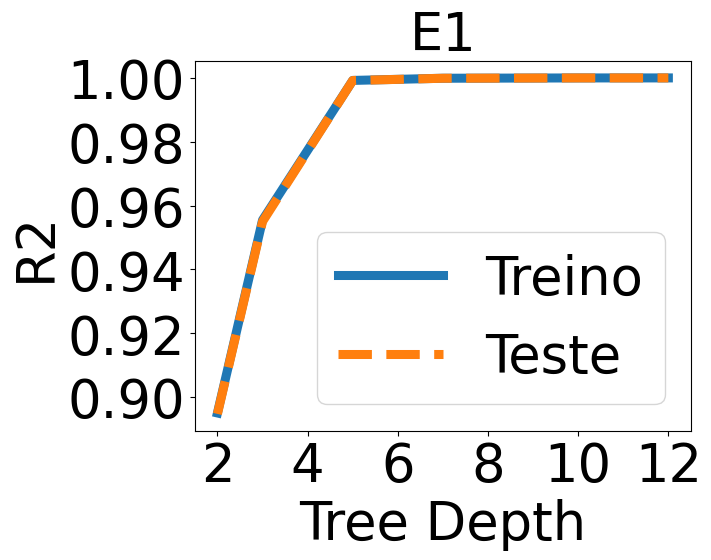

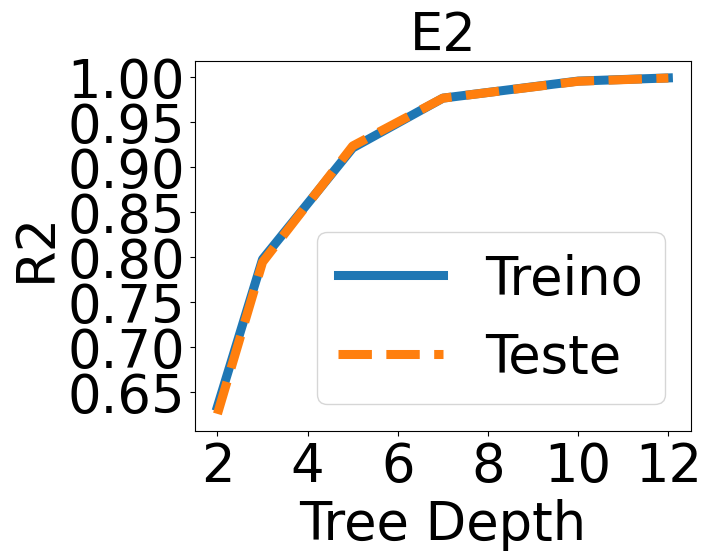

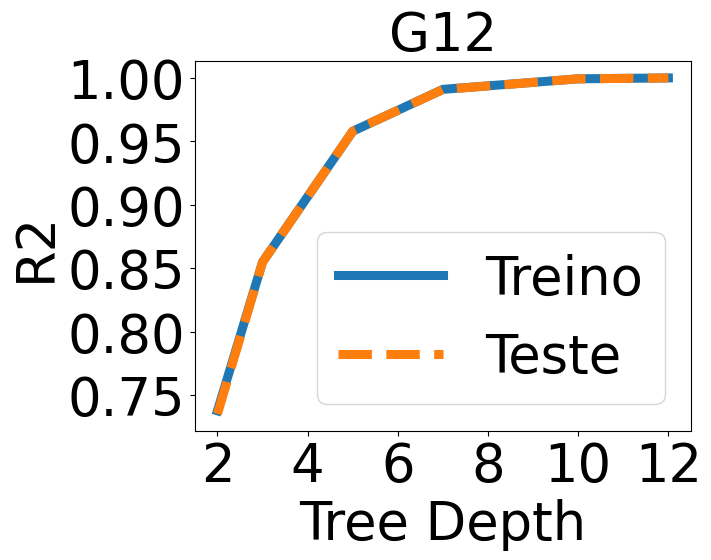

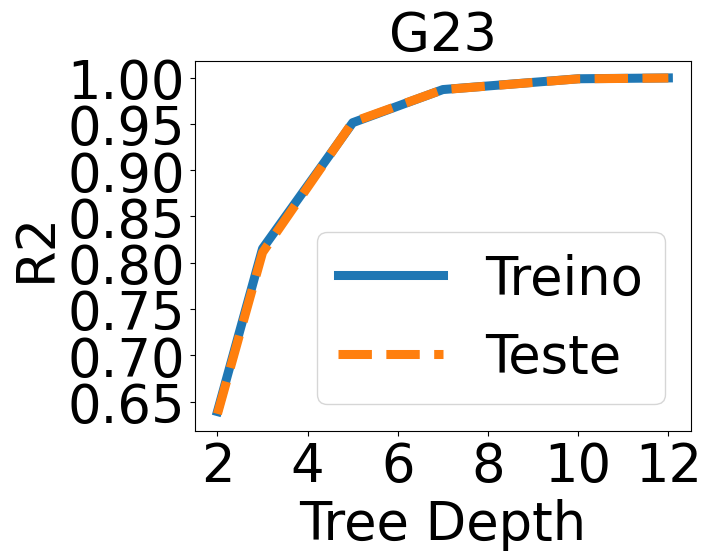

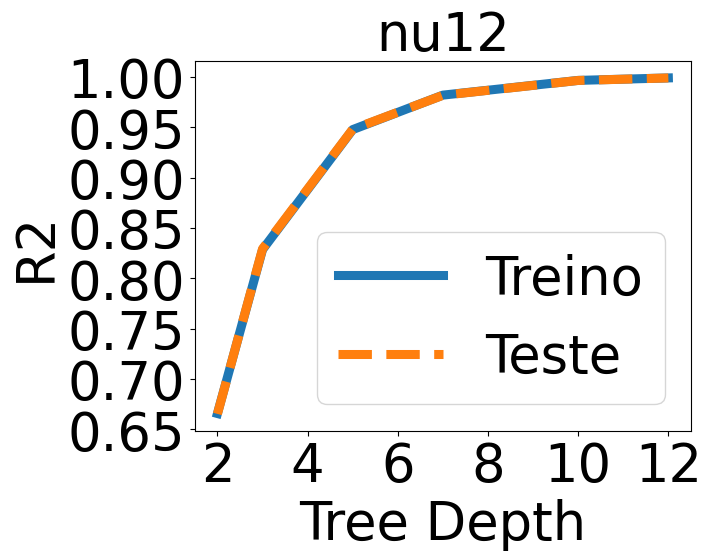

In [8]:
max_depth_list=[2,3, 5, 7, 10, 12]
plotModelComplexityDT(X,y_E1,X_E1_real,y_E1_real,max_depth_list,"E1")
plotModelComplexityDT(X,y_E2,X_E2_real,y_E2_real,max_depth_list,"E2")
plotModelComplexityDT(X,y_G12,X_G12_real,y_G12_real,max_depth_list,"G12")
plotModelComplexityDT(X,y_G23,X_G23_real,y_G23_real,max_depth_list,"G23")
plotModelComplexityDT(X,y_nu12,X_nu12_real,y_nu12_real,max_depth_list,"nu12")



### Visualização Melhor Modelo Árvore de Decisão

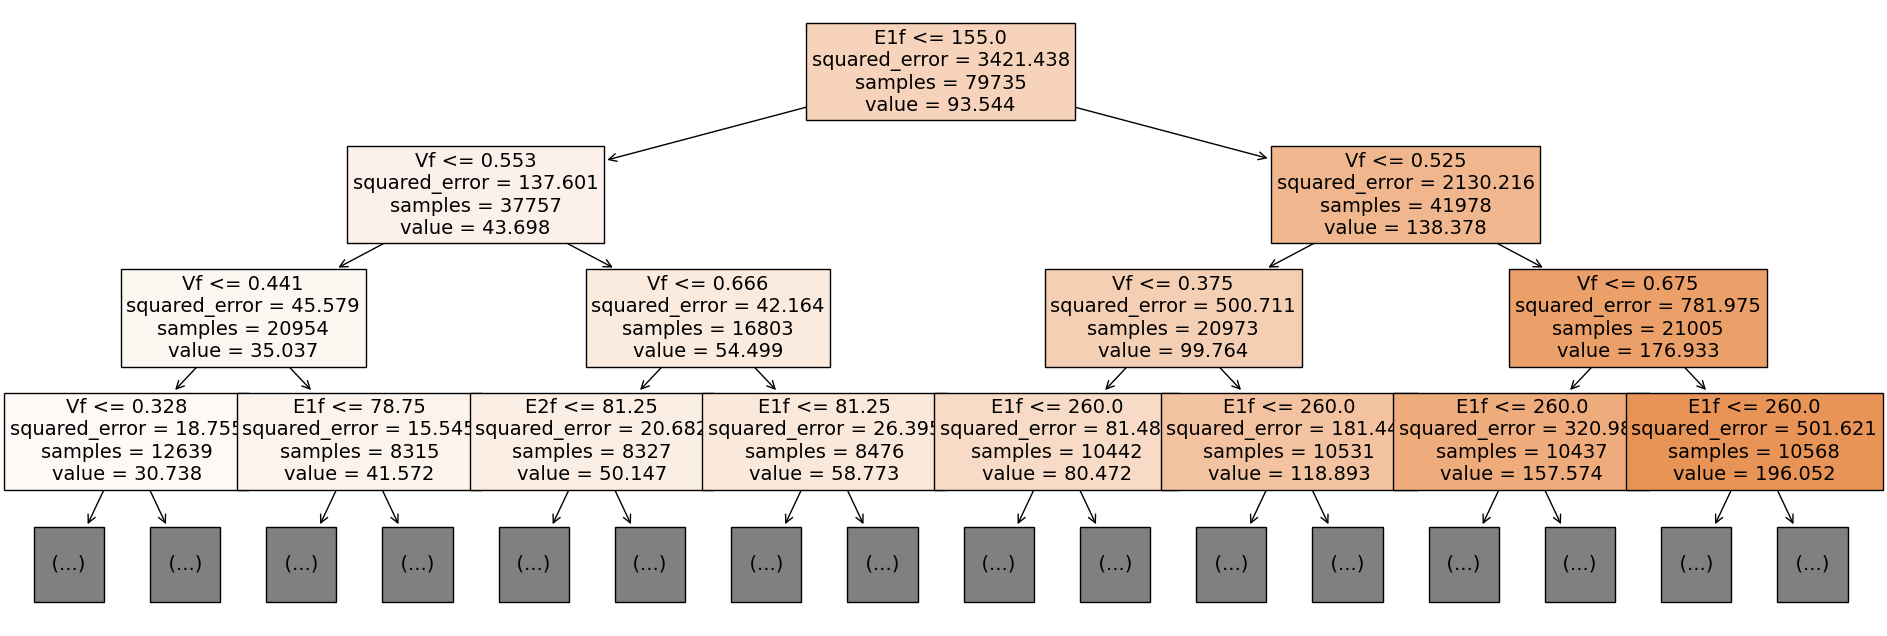

In [66]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,8))
plot_tree(best_model_DTR_E1,filled=True, max_depth = 3,fontsize=14,feature_names=['Vf',	'E1f','E2f','G12f',	'G23f',	'nu12f',	'Em',	'num'])
plt.show()

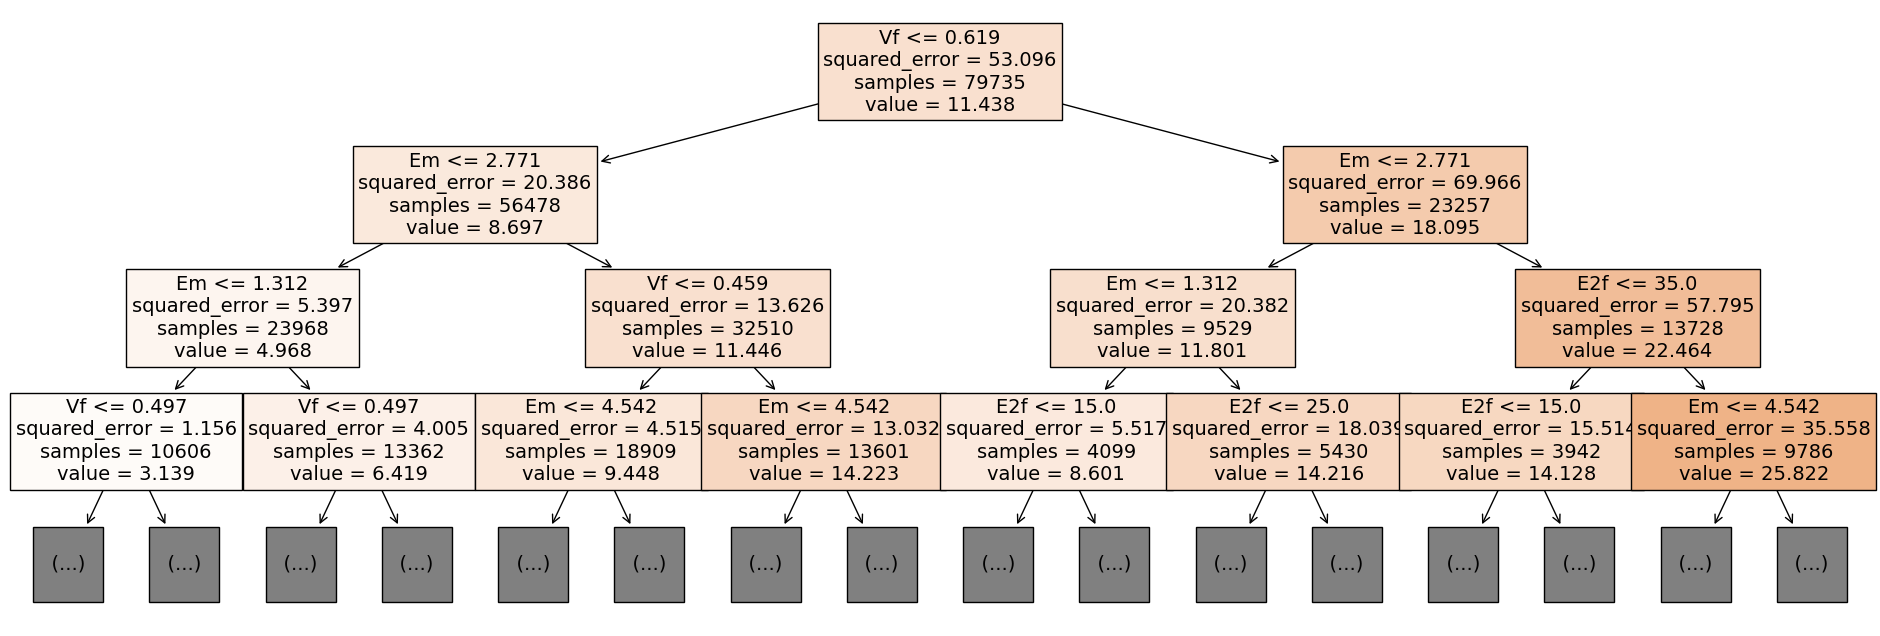

In [67]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,8))
plot_tree(best_model_DTR_E2,filled=True, max_depth = 3,fontsize=14,feature_names=['Vf',	'E1f','E2f','G12f',	'G23f',	'nu12f',	'Em',	'num'])
plt.show()

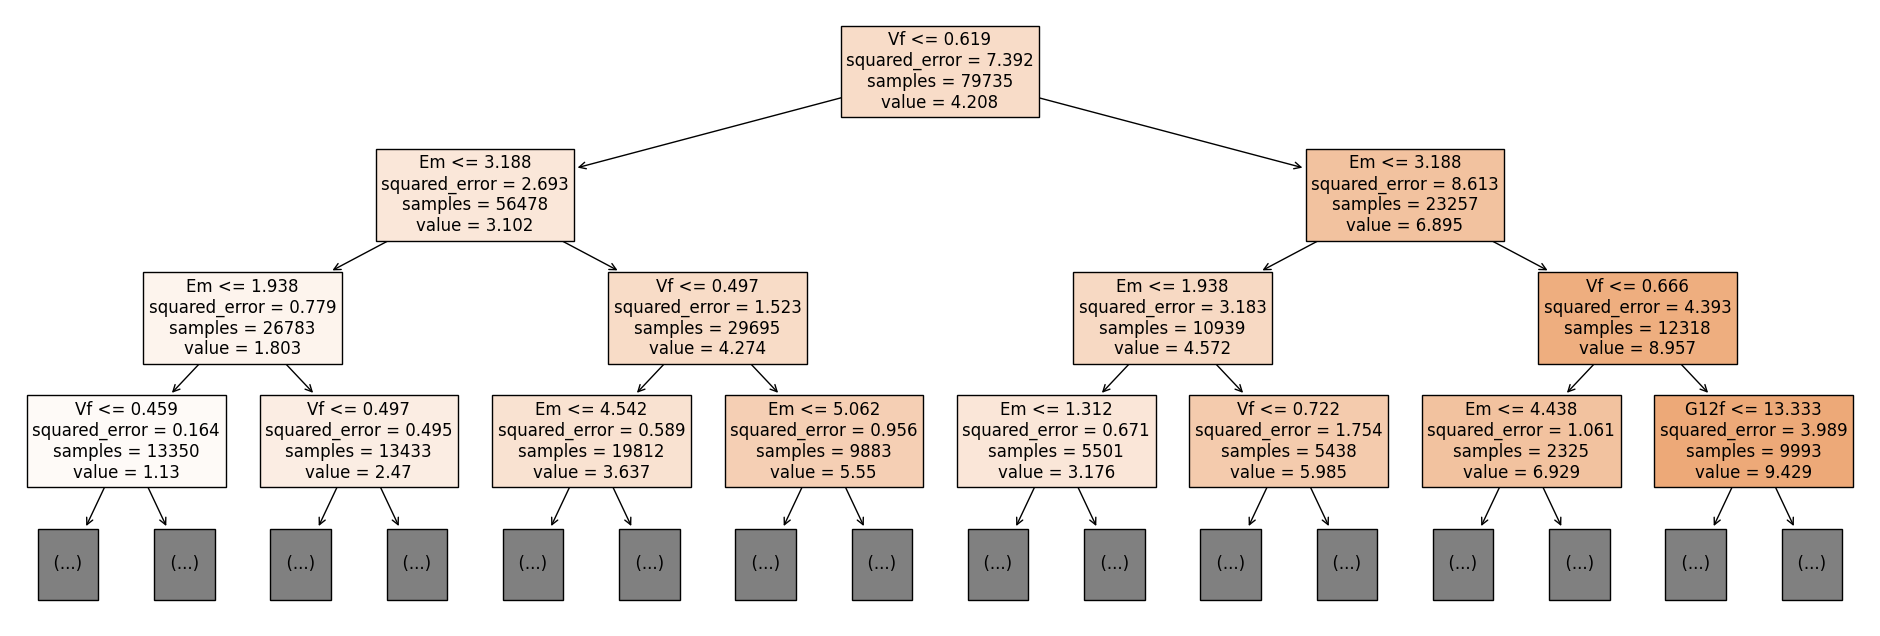

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,8))
plot_tree(best_model_DTR_G12,filled=True, max_depth = 3,fontsize=12,feature_names=['Vf',	'E1f','E2f','G12f',	'G23f',	'nu12f',	'Em',	'num'])
plt.show()

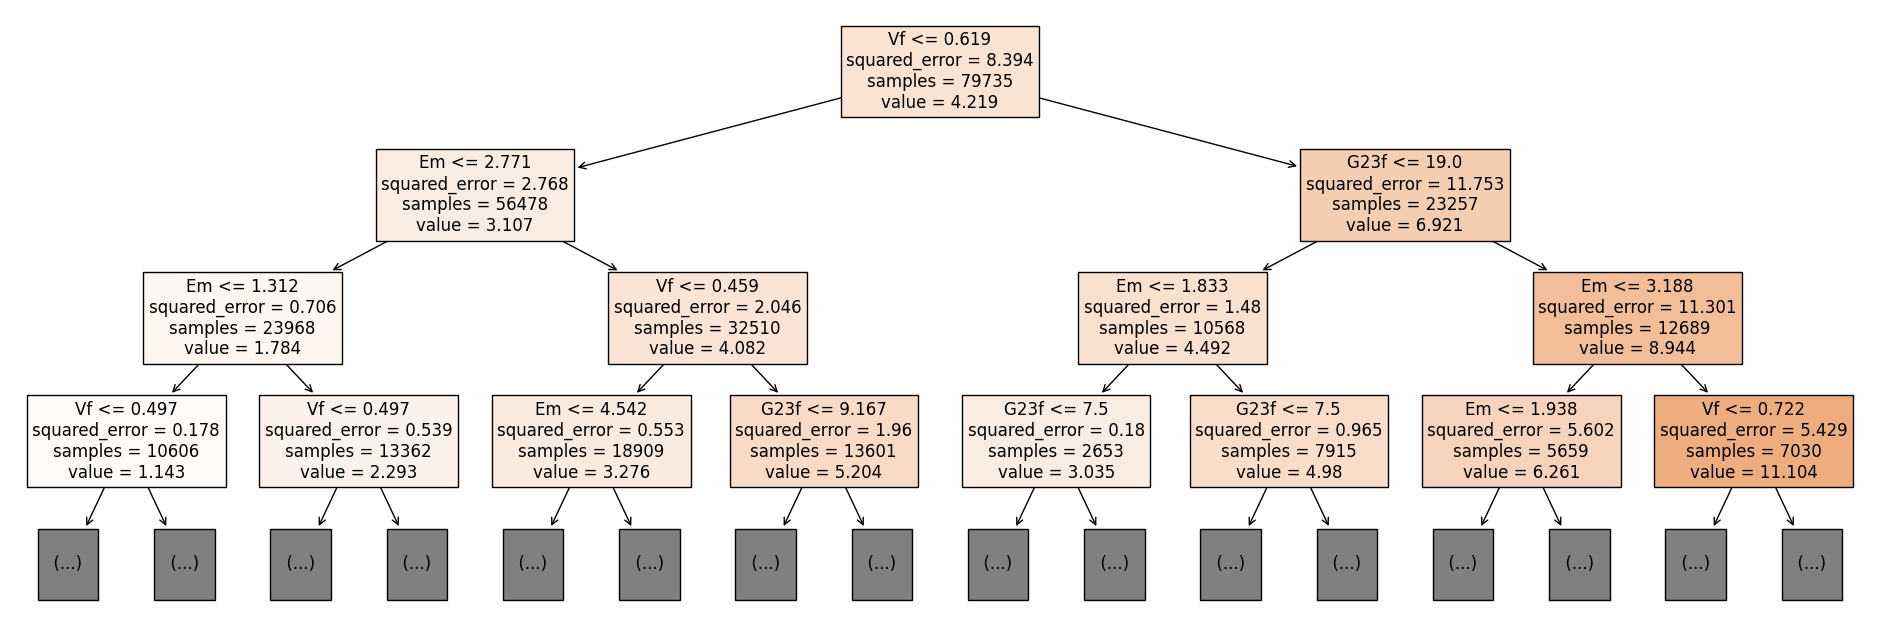

In [27]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,8))
plot_tree(best_model_DTR_G23,filled=True, max_depth = 3,fontsize=12,feature_names=['Vf',	'E1f','E2f','G12f',	'G23f',	'nu12f',	'Em',	'num'])
plt.show()

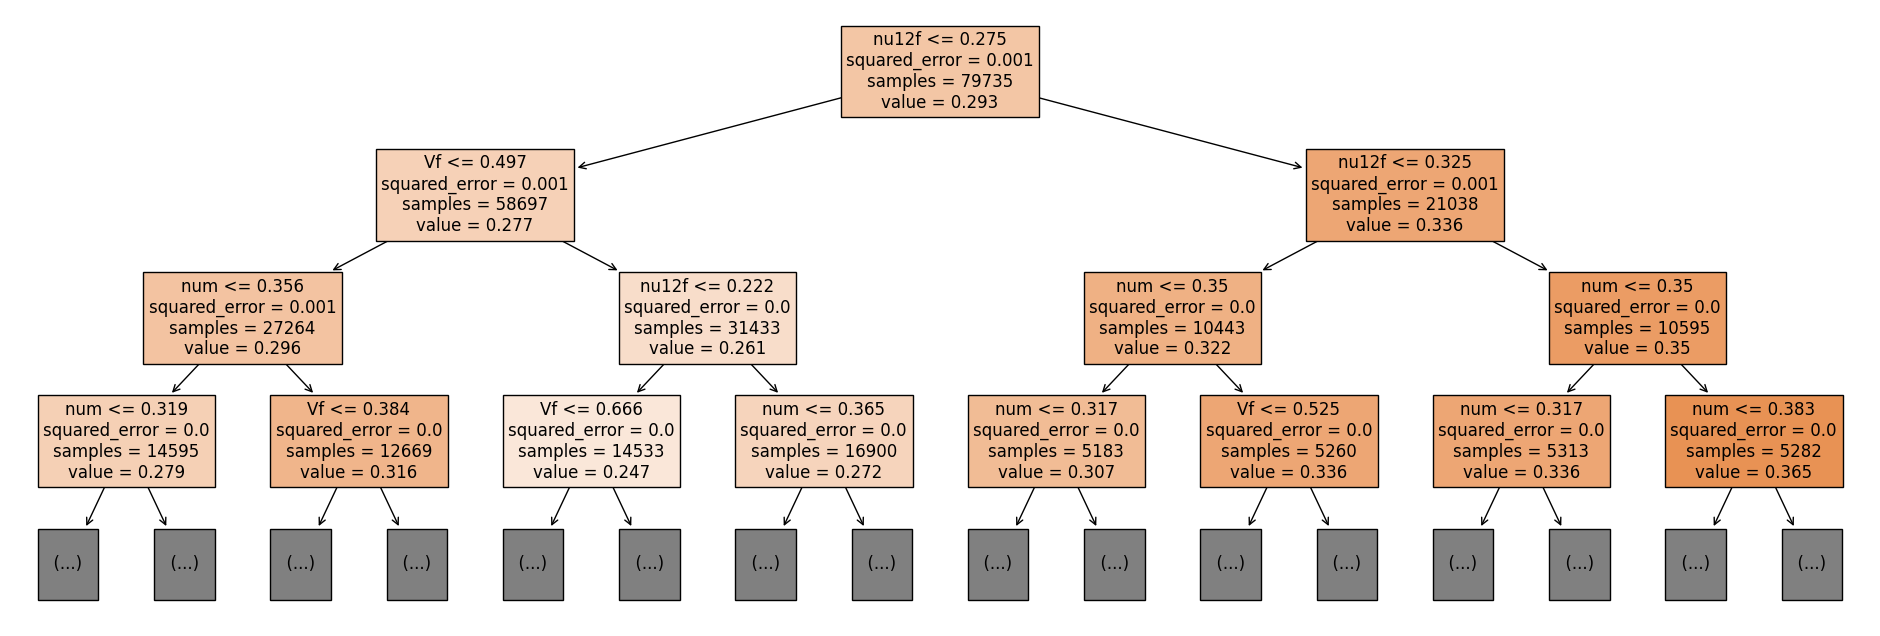

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,8))
plot_tree(best_model_DTR_nu12,filled=True, max_depth = 3,fontsize=12,feature_names=['Vf',	'E1f','E2f','G12f',	'G23f',	'nu12f',	'Em',	'num'])
plt.show()

### Visualização Importância das Características

In [61]:
def plotImportanciaDT(modelo,titulo):
  # Get feature importances from the model
  feature_importances = modelo.feature_importances_

  # Get feature names from the dataset
  feature_names = ['$V_f$',	'$E1_f$','$E2_f$','$G12_f$',	'$G23_f$',	'$nu12_f$',	'Em',	'$nu_m$']

  # Sort feature importances in descending order
  #sorted_idx = np.argsort(feature_importances)[::-1]

  # Plot the feature importances
  #plt.figure(figsize=(10, 6))
  #plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align="center")
  #plt.xticks(range(X.shape[1]), np.array(feature_names)[sorted_idx], rotation=45)
  plt.bar(range(X.shape[1]), feature_importances, align="center")
  plt.xticks(range(X.shape[1]), feature_names, rotation=45)
  plt.xlabel("Atributos",fontsize=38)
  plt.ylabel("Importância",fontsize=38)
  plt.xticks(fontsize=30)
  plt.yticks(fontsize=30)

  plt.title(titulo,fontsize=38)
  #plt.tight_layout()
  plt.show()

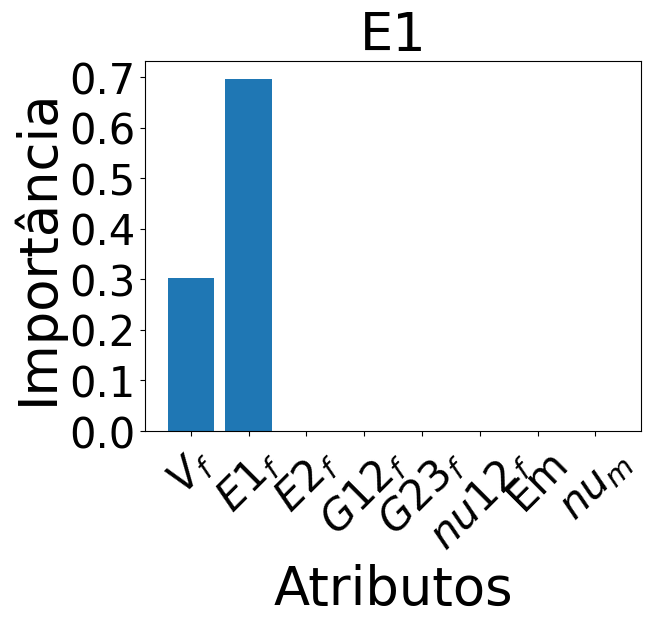

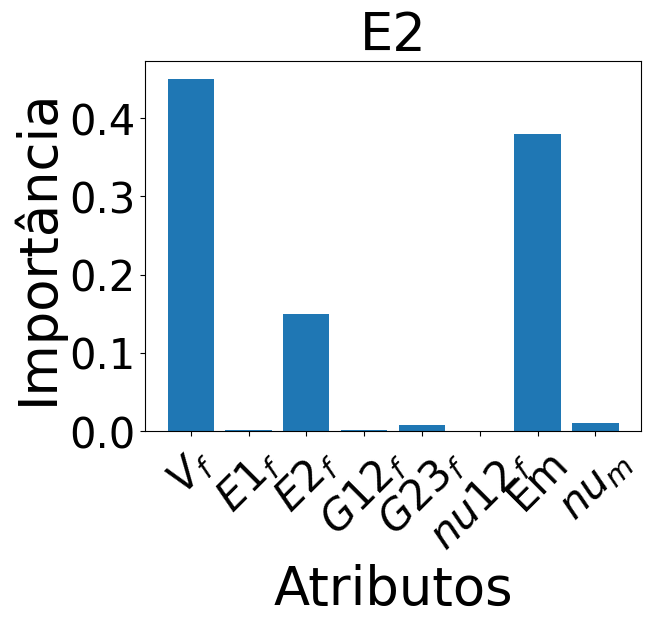

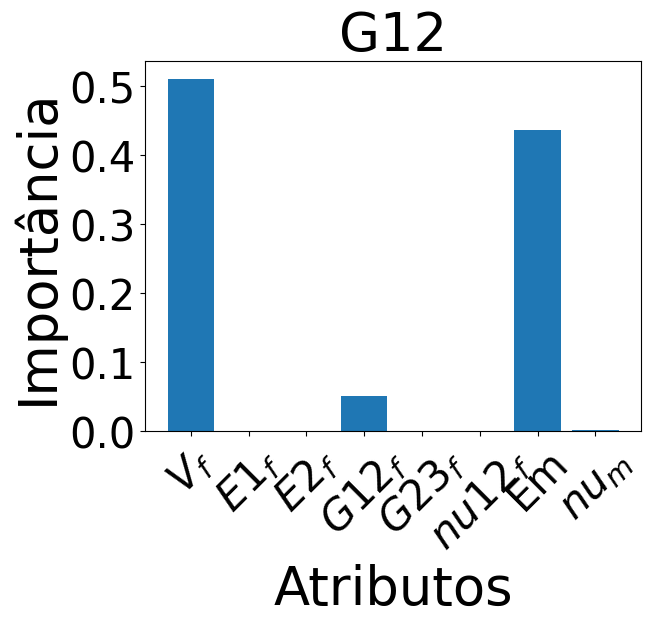

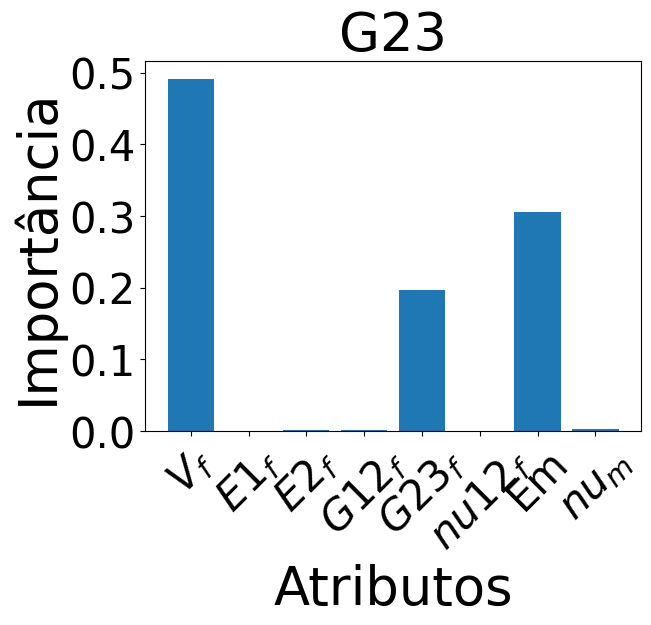

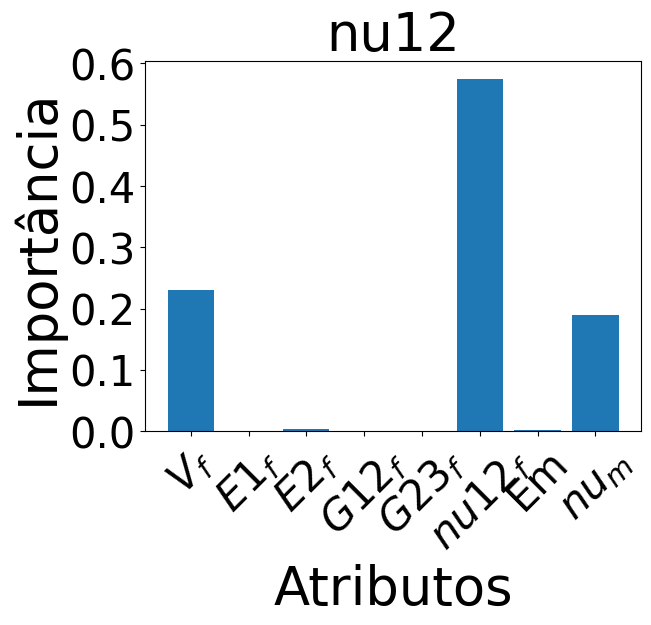

In [62]:
plotImportanciaDT(best_model_DTR_E1,"E1")
plotImportanciaDT(best_model_DTR_E2,"E2")
plotImportanciaDT(best_model_DTR_G12,"G12")
plotImportanciaDT(best_model_DTR_G23,"G23")
plotImportanciaDT(best_model_DTR_nu12,"nu12")